In [1]:
"""
Importing all libraries needed.
"""

from astropy.io import fits
import numpy as np
from scipy.odr import *
from astropy.coordinates import SkyCoord
from astroquery.vo_conesearch import ConeSearch
from scipy.ndimage import interpolation
from astropy import units as u
from astropy import constants as c
import astropy.coordinates as coord
from astropy import wcs
import aplpy
import matplotlib.pyplot as plt
from astropy.coordinates import ICRS,FK4
import math
import re

import pandas as pd

In [2]:
coords = "18 18 53.0 -15 59 30 "
source = "AX_J1818.8-1559"
obs = "3793"
file_name = "2014-05-10_Ks_AX_J1818.8-1559_3793_c1-4_56787_23944.mos.fits.cat"
FSRED_dir = "E:/Scriptie/"

flname = FSRED_dir + "FSRED/u018918_data/" + source + "/" + file_name # SExtractor catalog from the Taurus computer


XRB_coo = SkyCoord(coords, unit=(u.hourangle,u.deg))


In [14]:
coords = "17 38 58.300 -44 27 00.00 "
source = "4U_1735-44"
obs = "1148" # H
file_name = "2018-06-19_H_4U_1735-44_1148_c1-4_58288_17457.mos.fits.cat"

FSRED_dir = "E:/Scriptie/"

flname = FSRED_dir + "FSRED/u018918_data/" + source + "/" + file_name # SExtractor catalog from the Taurus computer


XRB_coo = SkyCoord(coords, unit=(u.hourangle,u.deg))

In [13]:
# coords = "17 38 58.300 -44 27 00.00 "
# source = "4U_1735-44"
# obs = "1153" # J 
# file_name = "2018-06-19_J_4U_1735-44_1153_c1-4_58288_18215.mos.fits.cat"

# FSRED_dir = "E:/Scriptie/"

# flname = FSRED_dir + "FSRED/u018918_data/" + source + "/" + file_name # SExtractor catalog from the Taurus computer


# XRB_coo = SkyCoord(coords, unit=(u.hourangle,u.deg))

# Try to open mos.fits file
I can indeed see there are 4 chips, with the source in the middle of one of them

 [astropy.io.fits.verify]


INFO: Auto-setting vmin to -9.787e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.363e+03 [aplpy.core]


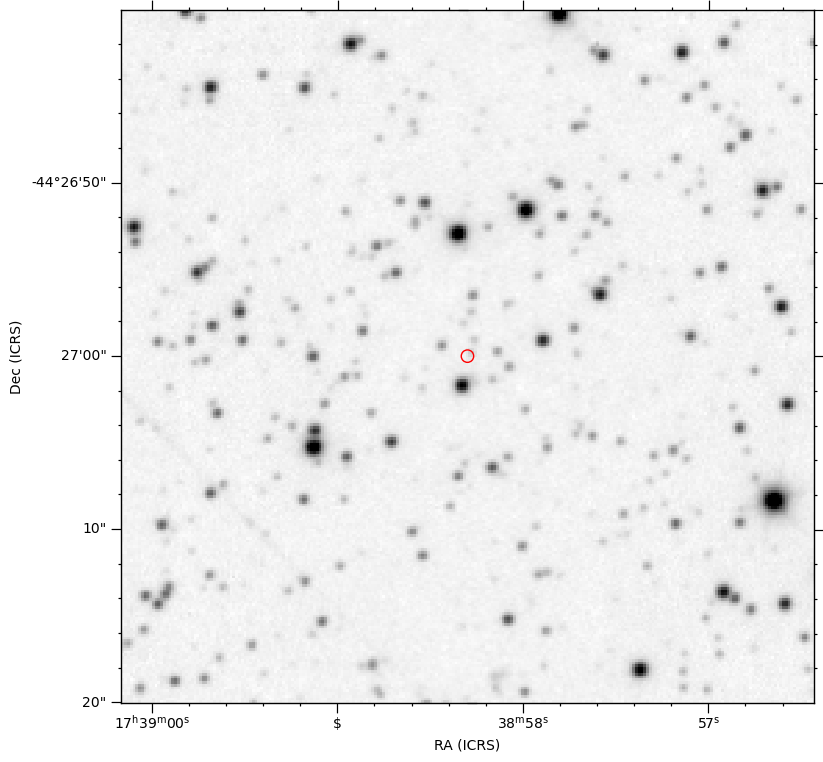

In [15]:
gc = aplpy.FITSFigure(flname[:-4]) # this is the mos.fits file
gc.show_colorscale(cmap='gist_heat_r',stretch='arcsinh')
gc.show_markers(XRB_coo.ra.deg, XRB_coo.dec.deg, 
                edgecolor='red', facecolor='none',
                marker='o', s=80, alpha=1)
gc.recenter(XRB_coo.ra.deg, XRB_coo.dec.deg, 
            radius=20/3600.)# degrees
gc.set_theme('publication')



In [5]:
# hdu=headerList[1]
# print('shape :',hdu.shape) #shape is 1024*1024

# Try to open mos.fits.cat file
Its hard to try something with pandas because of multidimensional columns

In [16]:
data = fits.getdata(flname,ext=2)
print(data.columns)
print(type(data))


TypeError: buffer is too small for requested array

In [14]:
hdulist = fits.open(flname)
hdulist.info()


Filename: E:/Scriptie/FSRED/u018918_data/4U_1735-44/2018-06-19_H_4U_1735-44_1148_c1-4_58288_17457.mos.fits.cat
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  LDAC_IMHEAD    1 BinTableHDU     12   1R x 1C   [12320A]   
  2  LDAC_OBJECTS    1 BinTableHDU     62   72968R x 14C   [1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1I, 625E, 1E]   
